In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models

In [2]:
## Loading the cifar10 data

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

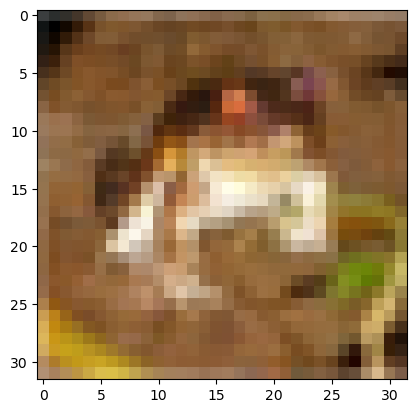

In [7]:
plt.imshow(X_train[0])

In [9]:
y_train.shape

(50000, 1)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
## y_train is a 2d array reshaping it to fit in 1d space

In [13]:
y_train=y_train.reshape(-1,)

In [14]:
y_train[0]

6

In [16]:
y_test = y_test.reshape(-1,)

In [17]:
## Defining classes column 

In [18]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [19]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

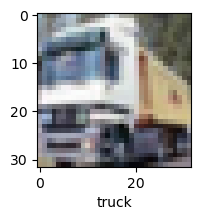

In [20]:
plot_sample(X_train,y_train,1)

In [21]:
## Normalising the image on a std scale of 255 as it is in rgb form 

In [22]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
# Building a simple ann modeland comparing it with cnn model 

In [24]:
X_train[0].shape

(32, 32, 3)

In [25]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train)

C:\Users\Sri\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.3097 - loss: 1.9243


In [27]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.35      0.42      1000
           1       0.60      0.33      0.42      1000
           2       0.22      0.51      0.31      1000
           3       0.39      0.10      0.17      1000
           4       0.31      0.32      0.32      1000
           5       0.46      0.23      0.30      1000
           6       0.37      0.60      0.46      1000
           7       0.47      0.45      0.46      1000
           8       0.66      0.38      0.48      1000
           9       0.41      0.63      0.50      1000

    accuracy                           0.39     10000
   macro avg       0.44      0.39      0.38     10000
weighted avg       0.44      0.39      0.38     10000



In [28]:
## Building a cnn model and checking if it improves the accuracy 

In [29]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Sri\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
cnn.fit(X_train, y_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.3681 - loss: 1.7351


In [33]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5584 - loss: 1.2561


[1.263890027999878, 0.5534999966621399]

In [36]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[5.3080539e-03, 1.2651430e-03, 9.1058306e-02, 5.0600559e-01,
        2.3970900e-02, 2.9828304e-01, 4.0998351e-02, 1.2999864e-02,
        1.6915649e-02, 3.1950888e-03],
       [2.9526657e-01, 3.6663786e-01, 1.7457857e-03, 3.8549646e-05,
        7.8745396e-04, 2.9126510e-05, 9.3172239e-06, 8.4806517e-05,
        2.9890096e-01, 3.6499694e-02],
       [2.7160954e-01, 2.1815483e-01, 3.0998809e-02, 3.7338398e-03,
        5.2926838e-03, 2.6210132e-03, 4.9020059e-04, 5.6603495e-03,
        3.7632576e-01, 8.5112996e-02],
       [5.8551186e-01, 2.2076806e-02, 1.8501760e-02, 5.9852772e-04,
        7.6057222e-03, 3.6459247e-04, 1.0596094e-04, 2.9135856e-03,
        3.5887408e-01, 3.4471187e-03],
       [1.7372062e-03, 1.0954657e-03, 2.0931014e-01, 1.9062223e-01,
        2.7957484e-01, 1.2220410e-01, 1.7994462e-01, 1.2115093e-02,
        2.0957687e-03, 1.3005733e-03]], dtype=float32)

In [37]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

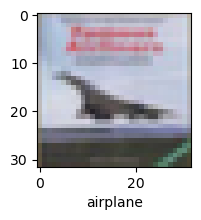

In [38]:
plot_sample(X_test, y_test,3)

In [39]:
classes[y_classes[3]]

'airplane'

In [41]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1000
           1       0.68      0.75      0.71      1000
           2       0.38      0.51      0.44      1000
           3       0.49      0.21      0.29      1000
           4       0.48      0.40      0.44      1000
           5       0.47      0.53      0.50      1000
           6       0.76      0.54      0.63      1000
           7       0.45      0.80      0.57      1000
           8       0.69      0.65      0.67      1000
           9       0.71      0.54      0.61      1000

    accuracy                           0.55     10000
   macro avg       0.57      0.55      0.55     10000
weighted avg       0.57      0.55      0.55     10000



In [42]:
## Clearly cnn performs better than ann 

In [ ]:
## For padding if used same we incorporate padding and if valid is used no padding is there ,and same if padding is used